# My SVM Implementation

    1. Notes for SVM
    2. My implementation from scratch and using library


## Notes for SVM
    A. Main idea
    B. How it works
    C. When to use it?

### A. Main idea

The main idea of SVM (Support Vector Machine) is to find the optimal hyperplane that separates the data. A hyperplane is a line or plane with margins on both sides. Margins represent the distance between the hyperplane and the nearest data points. The points lying on these margins are called support vectors. Using these support vectors, SVM maximizes the margin, which forms the basis of the model

![](image.png)

### B. How it works



The main goal of SVM is to maximize the minimum margin between the two classes. The larger the margin the better the model performs on new and unseen data. 

Equation of the hyperplane in SVM:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

Legend:  
- $\mathbf{w}$ – weight vector (defines the orientation of the hyperplane)  
- $\mathbf{x}$ – feature vector (a single data sample)  
- $b$ – bias term (shifts the hyperplane from the origin)  
- $0$ – decision boundary between classes

if it is greater than 0 it is positive class and other way, negative.


- Functional margin of a single point $(x_i, y_i)$:  

$$
\gamma_i^{(func)} = y_i \,( \mathbf{w}^T \mathbf{x}_i + b )
$$

- Geometric margin – the actual distance of a point from the hyperplane $\mathbf{w}^T \mathbf{x} + b = 0$:  

$$
\gamma_i^{(geom)} = \frac{y_i \, ( \mathbf{w}^T \mathbf{x}_i + b )}{\|\mathbf{w}\|}
$$


Thanks to the homogeneity of the model, we can impose that for support vectors (the closest points to the boundary) the functional margin equals 1:  

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) = 1
$$

Then the geometric margin for these points is:  

$$
\gamma^{(geom)} = \frac{1}{\|\mathbf{w}\|}
$$

We want to maximize the geometric margin:

$$
\max \frac{2}{\|\mathbf{w}\|} 
= \max \frac{1}{\|\mathbf{w}\|} 
= \min \|\mathbf{w}\| 
= \min \frac{1}{2} \|\mathbf{w}\|^2
$$

**Geometric margin in SVM**

For support vectors, the geometric margin is:

$$
\gamma = \frac{1}{\|\mathbf{w}\|}
$$

The total margin between two classes is the distance between the hyperplanes:

$$
\mathbf{w}^T \mathbf{x} + b = 1 \quad \text{and} \quad \mathbf{w}^T \mathbf{x} + b = -1
$$

This distance equals:

$$
\frac{2}{\|\mathbf{w}\|}
$$


**Simplification of the optimization problem**

Since multiplying by a positive constant does not change the point where the maximum is achieved, we can write:

$$
\max \frac{2}{\|\mathbf{w}\|} = \max \frac{1}{\|\mathbf{w}\|}
$$

Therefore, maximizing the margin is equivalent to minimizing the norm:

$$
\min \|\mathbf{w}\|
$$

and usually expressed in quadratic form as:

$$
\min \frac{1}{2}\|\mathbf{w}\|^2
$$

**Soft-margin SVM with hinge loss**

For classical SVM with a soft margin, we define hinge loss and regularization.  
The primal form of the objective function is:

$$
\min_{w,b,\{\xi_i\}} \ \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^{N} \xi_i
$$

subject to:

$$
y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$


We can also write it as a single loss function (without explicit $\xi_i$):

$$
L(\mathbf{w}, b) = \frac{1}{2}\|\mathbf{w}\|^2 
+ C \sum_{i=1}^{N} \max\big(0, \ 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b)\big)
$$

where:

- $\mathbf{w} \in \mathbb{R}^d$ – weight vector  
- $b \in \mathbb{R}$ – bias  
- $(x_i, y_i)$ – i-th training sample with label $y_i \in \{-1, +1\}$  
- $C > 0$ – regularization parameter (penalizes misclassifications)  
- $\max(0, \, 1 - y_i f(x_i))$ – hinge loss for sample $i$  

---

**Final form of the SVM loss function**

When implementing SVM "from scratch", the most common objective to minimize is:

$$
L(\mathbf{w}, b) \;=\; \frac{1}{2}\|\mathbf{w}\|^2 
+ C \sum_{i=1}^{N} \max\big(0, \; 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b)\big)
$$

- $\frac{1}{2}\|\mathbf{w}\|^2$ – penalty for large weights (regularization)  
- $C \sum_{i=1}^{N} \max(0, 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b))$ – total hinge loss (penalizes misclassified or weakly classified points)

**Slack variable ($\xi_i$) in soft-margin SVM**

The variable $\xi_i$ (read: "ksi i") is called a **slack variable** in SVM with a soft margin.  
It measures how much a given sample $x_i$ violates the separation constraint.

- If the sample is correctly classified and lies **outside the margin** (i.e. $y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1$), then:

$$
\xi_i = 0
$$

- If the sample lies **inside the margin** or is **misclassified**, then:

$$
\xi_i = 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b) > 0
$$

Thus, $\xi_i$ is exactly the surplus needed so that the inequality holds:

$$
y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i
$$




### C. Where to use it?



1. Your dataset is small to medium size (up to tens of thousands of points)  
2. You have high-dimensional input (hundreds to thousands of features)  

It's important to remember that SVM can have troubles with large and categorical data!


*Types of SVM:*

- **Linear SVM** – classical SVM with a linear decision boundary  
- **Non-linear SVM (Kernel SVM)** – uses kernel functions (RBF, polynomial, sigmoid) for non-linear separation  
- **Soft-margin SVM** – allows misclassifications using slack variables $\xi_i$  
- **Hard-margin SVM** – assumes perfect separation of data, no misclassifications (rare in practice)  


## My implementation from scratch


Planned workflow:

    1. Import libraries and data, Check Correlation of data , Standarize, Split,
    2. Code my implementation in 'my_svm_model.py', Use it, Check accuracy
    3. Use SVM library, check accuracy
    4. Compare two methods

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from my_svm import my_svm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
# Generating Dataset, Splitting

X, y = datasets.make_blobs(
            n_samples = 800,
            n_features=2,
            cluster_std=1,
            centers=2,
            random_state=123
)

y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train_1 = X_train[:,0]
X_train_2 = X_train[:,1]

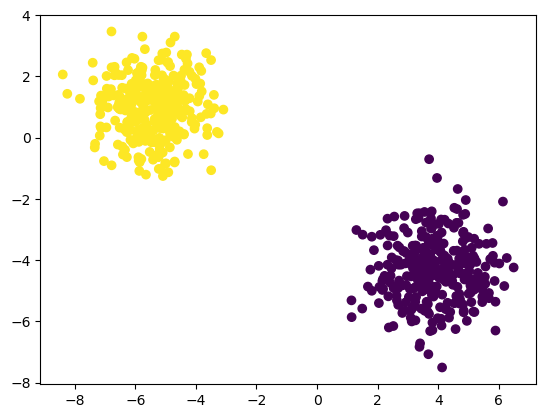

In [3]:
# Visualization
#y_train = np.vectorize()
plt.scatter(X_train_1, X_train_2, c=y_train)


### Using my implementation of SVM

Initialzing Model

In [4]:
model_1 = my_svm()

# Model training process
print(model_1.fit(X_train, y_train, 1.0, 100, 0.1))

Loss for 0th batch: 58771.019732236884, Current w: [-298.    169.53], Current b: -0.2
Loss for 10th batch: 7145.183965921695, Current w: [-103.91   59.11], Current b: -0.2
Loss for 20th batch: 868.6875630109358, Current w: [-36.23  20.61], Current b: -0.2
Loss for 30th batch: 105.61212779530393, Current w: [-12.63   7.19], Current b: -0.2
Loss for 40th batch: 12.839969181544733, Current w: [-4.4   2.51], Current b: -0.2
Loss for 50th batch: 1.5610404981382182, Current w: [-1.54  0.87], Current b: -0.2
Loss for 60th batch: 0.18978608144404033, Current w: [-0.54  0.3 ], Current b: -0.2
Loss for 70th batch: 0.15305648609516265, Current w: [-0.5   0.23], Current b: -0.2
Loss for 80th batch: 0.13778659841272378, Current w: [-0.5   0.16], Current b: -0.2
Loss for 90th batch: 0.2733127095908777, Current w: [-0.61  0.41], Current b: -0.3
Loss for 100th batch: 0.2129387240463328, Current w: [-0.57  0.31], Current b: -0.3
None


Visualization of Loss


Text(0.5, 1.0, 'Loss decline while training')

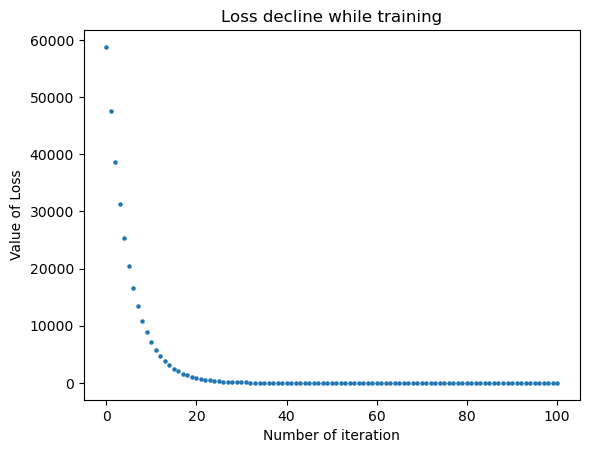

In [5]:
array_of_loss = model_1.loss_array
array_of_loss

batch = array_of_loss.keys()
loss_value = array_of_loss.values()

plt.scatter(batch, loss_value, s=5)
plt.xlabel('Number of iteration')
plt.ylabel('Value of Loss')
plt.title('Loss decline while training')


Predicting and checking accuracy to orginal outputs

In [6]:
# Predicting 
prediction = model_1.predict(X_test)
print(f'Example prediction: {prediction[:5]}')
print(f'Accuracy: {accuracy_score(prediction, y_test)}')

Example prediction: [-1.  1.  1.  1. -1.]
Accuracy: 1.0


### Visualization of Hyperlane

In [7]:
# Visualization
#y_train = np.vectorize()

def finding_x_2(w, x, b):
    x_2 = ((- w[0] * x[:,0]) / w[1]) - (b / w[1])
    return x_2

w = model_1.w
b = model_1.b
margin = 2 / w

x_1_min = np.amin(X_train[:,0])
x_1_max = np.amax(X_train[:,0])

x_2_min = np.amin(X_train[:,1])
x_2_max = np.amax(X_train[:,1])

x_0_2 = finding_x_2(w, X_train, b)




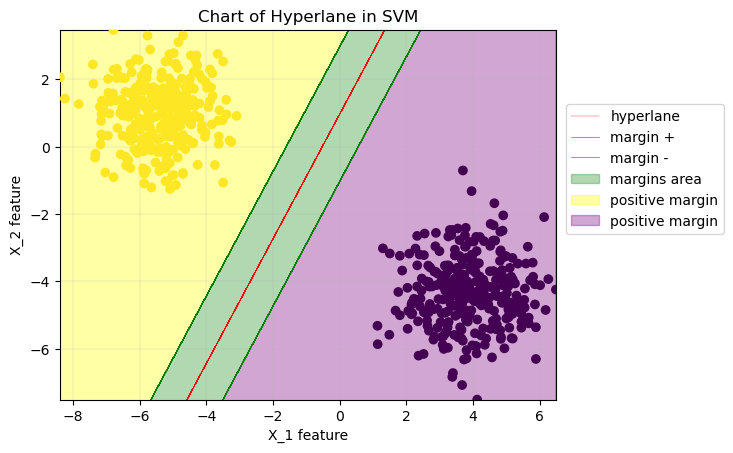

In [8]:
def Visualization_function(x_0_2, x_1_min, x_2_max, X, y):
    fig, ax = plt.subplots()

    # grid i scatter
    ax.grid(linewidth=0.2, alpha=0.9, zorder=0)
    ax.scatter(X[:,0], X[:,1], c=y, zorder=3)

    # hyperlane i margin
    hyperlane = ax.plot(X[:,0], x_0_2,        color='red',   linewidth=0.25, label='hyperlane')
    margin_positive = ax.plot(X[:,0], x_0_2 + 2,    color='green', linewidth=0.4,  label='margin +')
    margin_negative = ax.plot(X[:,0], x_0_2 - 2,    color='green', linewidth=0.4,  label='margin -')

    # sortowanie po X, żeby fill_between działało poprawnie
    idx = np.argsort(X[:,0])
    x_sorted = X[idx,0]
    upper = x_0_2[idx] + 2
    lower = x_0_2[idx] - 2

    # zacieniowanie obszaru między marginami
    ax.fill_between(x_sorted, lower, upper,
                    color='green', alpha=0.3, label='margins area')

    # Area of positive class
    ax.fill_between(x_sorted, upper, x_2_max, color='yellow', alpha=0.35, label='positive margin')

    ax.fill_between(x_sorted, x_1_min, lower, color='purple', alpha=0.35, label='positive margin')

    # legenda i limity
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 0.8), borderaxespad=0)
    ax.set_xlim(np.amin(X[:,0]), np.amax(X[:,0]))
    ax.set_ylim(np.amin(X[:,1]), np.amax(X[:,1]))

    plt.xlabel('X_1 feature')
    plt.ylabel('X_2 feature')
    plt.title('Chart of Hyperlane in SVM')

    plt.show()

Visualization_function(x_0_2, x_1_min, x_2_max, X_train, y_train)



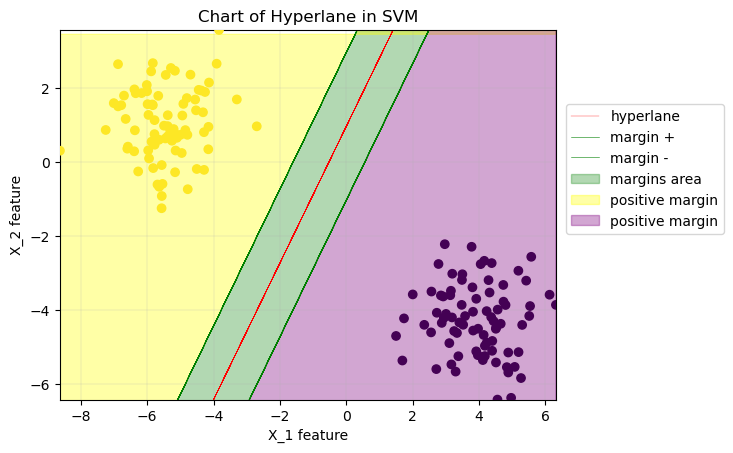

In [9]:
x_0_2 = finding_x_2(w, X_test, b)
Visualization_function(x_0_2, x_1_min, x_2_max, X_test, y_test)

### Classification using sklearn

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

prediction_scikit = clf.predict(X_test)
print('Accuracy for Sklearn: ',accuracy_score(y_test, prediction_scikit))


Accuracy for Sklearn:  1.0


Visualization for training data using sklearn library:

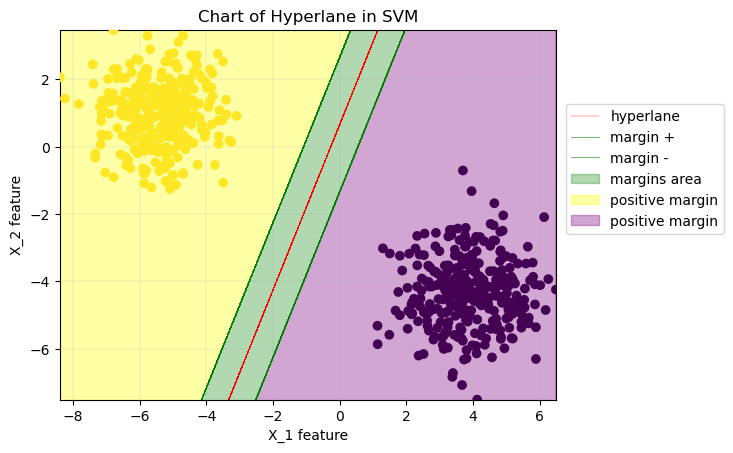

In [11]:
w_sklearn = clf.coef_[0]
b_sklearn = clf.intercept_[0]

x_0_2 = finding_x_2(w_sklearn, X_train, b_sklearn)
Visualization_function(x_0_2, x_1_min, x_2_max, X_train, y_train)

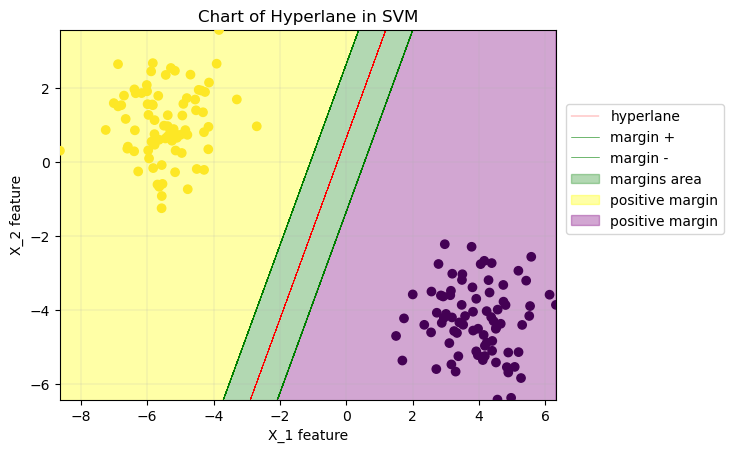

In [12]:

x_1_min = np.amin(X_test[:,0])
x_1_max = np.amax(X_test[:,0])

x_2_min = np.amin(X_test[:,1])
x_2_max = np.amax(X_test[:,1])

x_0_2 = finding_x_2(w_sklearn, X_test, b_sklearn)
Visualization_function(x_0_2, x_1_min, x_2_max, X_test, y_test)



In [13]:
print(f'For my implementation, W: {np.round(model_1.w, 2)} and b: {np.round(model_1.b, 2)}')
print(f'Accuracy: {accuracy_score(prediction, y_test)}')

print('-----------------------------------------')

print(f'Implementation using Sklearn, W: {np.round(w_sklearn, 2)} and b: {np.round(b_sklearn, 2)}')
print('Accuracy for Sklearn: ',accuracy_score(y_test, prediction_scikit))

For my implementation, W: [-0.57  0.31] and b: -0.3
Accuracy: 1.0
-----------------------------------------
Implementation using Sklearn, W: [-0.36  0.15] and b: -0.1
Accuracy for Sklearn:  1.0
